<a href="https://colab.research.google.com/github/gilbert-umuzi/acn-certificate-completers-survey/blob/main/Course_completers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
Estimate the number of ACN certificate completers who are economically active after the program and their increase in income.

Possible extentions: create a 2 x 2 matrix with % complete on x-axis and y% got job on y-axis with learners grouped by certificate and country. grouped by demographics, urban / rural (see Google.org's requirements).

# Method
- import ACN Learner data and Applicant data (does not include non-course finishers)
- merge with completers survey results (matching by email?)
- filter survey results by [certificate, country, etc.]
- plot on 2x2 matrix (scatterplot?)
  - have calcualted % got job (and other survey results) by cert
  - (have not calcualted % complete)

# Issues
- Survey results by Certificate - Google Data Analytics Percentage = Count.

# Setup

In [ ]:
# Setup
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import ACN learner registration data

In [ ]:
# Download .csv from Airtable > Online Learning > Learners > Course completion survey responders : https://airtable.com/app4TZRFBbfHziHYV/tbluzbE2ZzArqUz4d/viwtyvkbcCzG2NPqH?blocks=hide
# Upload the learner registration data as a .csv

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Learners-Course completion survey responders (1).csv to Learners-Course completion survey responders (1) (3).csv
User uploaded file "Learners-Course completion survey responders (1) (3).csv" with length 437374 bytes


In [ ]:
# Get the filename from the uploaded file
file_name = list(uploaded.keys())[0]  # take the first (and presumably only) filename

# Read the csv file
registration_data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
registration_data.head()

,ID Email,Name,Collection Rollup,Overall status (new end date),Collections completed,Number of Collections registered,Number of Collections registered (from manual input),Collections correlation,Courses unenrolled from (MiniExt form),Completed Courses,Collections,Country,Learner Status
0,karenwngugi12@gmail.com,NaN,NaN,🏁 Finished: Google Data Analytics,Google Data Analytics,0,2,NaN,NaN,NaN,"Google Data Analytics,Google IT Automation wit...",Kenya,Graduated (GwG) - 30-Dec-21
1,vickiedami@gmail.com,Victoria Ogunrinola,"Google IT Automation with Python, Google Data ...",🏁 Finished: Google Data Analytics,Google Data Analytics,2,1,NaN,NaN,"""Foundations: Data, Data Everywhere"", Analyze ...",Google Data Analytics,Nigeria,Graduated (GwG) - 30-Dec-21
2,aanuoluwaadekoya@gmail.com,Aanuoluwa Adekoya,"Google Data Analytics, Google IT Support Profe...",🏁 Finished: Google Data Analytics,Google Data Analytics,2,2,True,NaN,"Ask Questions to Make Data-Driven Decisions, D...","Google IT Automation with Python,Google IT Sup...",Nigeria,Graduated (GwG) - 30-Dec-21
3,owolabiaanu1@gmail.com,Aanuoluwa Owolabi,"Google Data Analytics, Google Digital Marketin...",🏁 Finished: Google Data Analytics,Google Data Analytics,2,1,NaN,NaN,"Share Data Through the Art of Visualization, G...",Google Data Analytics,NaN,NaN
4,olaitanhumble@gmail.com,Abdulafeez Olaitan,"Meta Database Engineer, Google Data Analytics",🏁 Finished: Google Data Analytics,Google Data Analytics,2,1,NaN,NaN,"Share Data Through the Art of Visualization, G...",Google Data Analytics,NaN,Graduated (GwG) - 26-Oct-22


In [ ]:
registration_data.columns

Index(['ID Email', 'Name', 'Collection Rollup',
       'Overall status (new end date)', 'Collections completed',
       'Number of Collections registered',
       'Number of Collections registered (from manual input)',
       'Collections correlation', 'Courses unenrolled from (MiniExt form)',
       'Completed Courses', 'Collections', 'Country', 'Learner Status'],
      dtype='object')

In [ ]:
print(f"Country is blank: {registration_data['Country'].isna().sum()}")
print(f"Country is not blank: {registration_data['Country'].notna().sum()}")

Country is blank: 538
Country is not blank: 89


# Import ACN learner completion survey results

In [ ]:
# Upload the course completers data as a .csv from Airtable > Online Learning > Course completers survey > Overall Course Finishers: https://airtable.com/app4TZRFBbfHziHYV/tbl9sxhlrFlOLDsjt/viwtHlKwtxmUTn7cO?blocks=hide

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Course completion survey-Completed Completion Survey (Employment Questions) (1).csv to Course completion survey-Completed Completion Survey (Employment Questions) (1) (2).csv
User uploaded file "Course completion survey-Completed Completion Survey (Employment Questions) (1) (2).csv" with length 143409 bytes


In [ ]:
# Get the filename from the uploaded file
file_name = list(uploaded.keys())[0]  # take the first (and presumably only) filename

# Read the csv file
survey_data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
survey_data.head()

,Survey ID,Learners,ID Email (from Learners),Name (from Learners),First Name (from Learners),Survey Type,"As a result of the course, I feel I know more people who can help me in developing my career",Through the course I have extended my connections with peers,I feel ready to start a job in the subject I learnt,I feel more confident to apply for jobs with this certification,...,Is the income generated from this job sufficient for you to live comfortably? (this could be to support just yourself or the people you care for),What company are you working for?,When did you get this job?,The courses on the ACN Scholarship helped me land this job?,Type of employment,"Do you have a higher income after completing the program, compared to the start of the program?",What was your average income before participating in the program?,What is your average income after participating in the program?,Are you comfortable answering questions relating to your income?,Submission date
0,Erica NgabireErica Ngabire - ericangabi@gmail...,ericangabi@gmail.com,ericangabi@gmail.com,"Erica Ngabire, Erica Ngabire",Erica,Course completion survey,Neutral,Neutral,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25 August 2022
1,Joy Masemola - joy.masemola@umuzi.org,joy.masemola@umuzi.org,joy.masemola@umuzi.org,Joy Masemola,Joy,Course completion survey,Agree,Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 October 2021
2,Goitsemang Mvula - go_itse@icloud.com,go_itse@icloud.com,go_itse@icloud.com,Goitsemang Mvula,Goitsemang,Course completion survey,Neutral,Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 August 2022
3,Karen Kieti - kazkieti@gmail.com,kazkieti@gmail.com,kazkieti@gmail.com,Karen Kieti,Karen,Course completion survey,Disagree,Disagree,I feel the same,Agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 October 2021
4,Melody Bankole - melodybankole@gmail.com,melodybankole@gmail.com,melodybankole@gmail.com,Melody Bankole,Melody,Course completion survey,Neutral,Neutral,Disagree,I feel the same,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 October 2021


In [ ]:
survey_data.columns

Index(['Survey ID', 'Learners', 'ID Email (from Learners)',
       'Name (from Learners)', 'First Name (from Learners)', 'Survey Type',
       'As a result of the course, I feel I know more people who can help me in developing my career',
       'Through the course I have extended my connections with peers',
       'I feel ready to start a job in the subject I learnt',
       'I feel more confident to apply for jobs with this certification',
       'The skills I’ve learnt in this course will be useful for my career',
       'I plan to pursue a career in the topic of my certificate',
       'I am able to showcase what I learnt in this course to a potential employer',
       'I feel that employers will take this certification seriously',
       'I need to get more qualifications before an employer would consider me',
       'I need to get more experience before an employer would consider me',
       'I know exactly what I need to do to get a job and start a career in the chosen field',
 

# Import Applicant Data

In [ ]:
# Upload the course completers data as a .csv from Airtable > ACN Applicants > Applicants > Completed Completion Survey: https://airtable.com/appPDdDtB8y4K5hJH/tbl2mTe7FIbkKrX8C/viwUqHCk1T5da1716?blocks=hide

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Applicants-Gilbert's Grid.csv to Applicants-Gilbert's Grid (3).csv
User uploaded file "Applicants-Gilbert's Grid (3).csv" with length 115817 bytes


In [ ]:
# Get the filename from the uploaded file
file_name = list(uploaded.keys())[0]  # take the first (and presumably only) filename

# Read the csv file
applicant_data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
applicant_data.head()

,Learner ID,Record created,Email address,First Name,Last name,Preferred Name,Gender,Do you have a computer to do this course?,How do you connect to the internet?,Nationality,...,Race,Education currently busy with (if not highest education achieved),Age,English proficiency,Daily Responsibilities,Approx. monthly income (USD),What commitments would you have to continue with?,Aptitude test status,Generalised Education level,Disability description
0,- cjdigify@gmail.com,19 July 2022,cjdigify@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,Not Completed,NaN,NaN
1,- tee.mfkng19@gmail.com,19 July 2022,tee.mfkng19@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0,NaN,NaN,NaN,NaN,Not Completed,NaN,NaN
2,Eunice CODO - codoeunice40@gmail.com,5 February 2022,codoeunice40@gmail.com,Eunice,CODO,Eunice,Female,I have my own computer,"I have reliable internet (wifi/data), more tha...",Benin,...,Black,NaN,21.0,"""I can read, write and speak English easily""",I have a lot of tasks to do at home that take ...,$60,NaN,Completed,NaN,NaN
3,Melvine Alicette Amélée Founmilayo AGBOKOU - m...,13 February 2022,melagk16@gmail.com,Melvine Alicette Amélée Founmilayo,AGBOKOU,Founmilayo,Female,I have my own computer,"I use mobile data, and can afford 2GB or less ...",Benin,...,Black,NaN,21.0,"""I can read, write and speak English but it is...",I have a lot of tasks to do at home that take ...,$75,NaN,Completed,NaN,NaN
4,Mathias Bizimana - bizimanamathias042@gmail.com,4 May 2021,bizimanamathias042@gmail.com,Mathias,Bizimana,Mathias,Male,I have my own computer,I have very limited mobile data.,Burundian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Completed,NaN,NaN


In [ ]:
applicant_data.columns

Index(['Learner ID', 'Record created', 'Email address', 'First Name',
       'Last name', 'Preferred Name', 'Gender',
       'Do you have a computer to do this course?',
       'How do you connect to the internet?', 'Nationality',
       'Highest Education ACN', 'Refugee ACN', 'Date of birth', 'Country',
       'Movement (location)', 'Displacement status', 'Country of birth',
       'No longer in country', 'Disability',
       'Are you currently living as a refugee?', 'Nearest Metropolitan area',
       'How close do you live to this city/town?', 'Race',
       'Education currently busy with (if not highest education achieved)',
       'Age', 'English proficiency', 'Daily Responsibilities',
       'Approx. monthly income (USD)',
       'What commitments would you have to continue with?',
       'Aptitude test status', 'Generalised Education level',
       'Disability description'],
      dtype='object')

In [ ]:
applicant_data['Nationality'].notna().sum()

260

In [ ]:
applicant_data[applicant_data['Nationality'].isna() == True]

,Learner ID,Record created,Email address,First Name,Last name,Preferred Name,Gender,Do you have a computer to do this course?,How do you connect to the internet?,Nationality,...,Race,Education currently busy with (if not highest education achieved),Age,English proficiency,Daily Responsibilities,Approx. monthly income (USD),What commitments would you have to continue with?,Aptitude test status,Generalised Education level,Disability description
0,- cjdigify@gmail.com,19 July 2022,cjdigify@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,Not Completed,NaN,NaN
1,- tee.mfkng19@gmail.com,19 July 2022,tee.mfkng19@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0,NaN,NaN,NaN,NaN,Not Completed,NaN,NaN


# Merge learner data with survey data and applicant data

In [ ]:
# First, make sure the keys you want to merge on are named the same in both DataFrames. If not, you can rename them:
survey_data = survey_data.rename(columns={'Learners': 'ID Email'})
applicant_data = applicant_data.rename(columns={'Email address': 'ID Email'})

# Now you can perform the merge
data = registration_data.merge(survey_data, on='ID Email', how='left')
data = data.merge(applicant_data, on='ID Email', how='left')

data.head()


,ID Email,Name,Collection Rollup,Overall status (new end date),Collections completed,Number of Collections registered,Number of Collections registered (from manual input),Collections correlation,Courses unenrolled from (MiniExt form),Completed Courses,...,Race,Education currently busy with (if not highest education achieved),Age,English proficiency,Daily Responsibilities,Approx. monthly income (USD),What commitments would you have to continue with?,Aptitude test status,Generalised Education level,Disability description
0,karenwngugi12@gmail.com,NaN,NaN,🏁 Finished: Google Data Analytics,Google Data Analytics,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vickiedami@gmail.com,Victoria Ogunrinola,"Google IT Automation with Python, Google Data ...",🏁 Finished: Google Data Analytics,Google Data Analytics,2,1,NaN,NaN,"""Foundations: Data, Data Everywhere"", Analyze ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aanuoluwaadekoya@gmail.com,Aanuoluwa Adekoya,"Google Data Analytics, Google IT Support Profe...",🏁 Finished: Google Data Analytics,Google Data Analytics,2,2,True,NaN,"Ask Questions to Make Data-Driven Decisions, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,owolabiaanu1@gmail.com,Aanuoluwa Owolabi,"Google Data Analytics, Google Digital Marketin...",🏁 Finished: Google Data Analytics,Google Data Analytics,2,1,NaN,NaN,"Share Data Through the Art of Visualization, G...",...,Black,NaN,29.0,"""I can read, write and speak English easily""",I have a lot of tasks to do at home that take ...,NaN,NaN,Completed,NaN,NaN
4,olaitanhumble@gmail.com,Abdulafeez Olaitan,"Meta Database Engineer, Google Data Analytics",🏁 Finished: Google Data Analytics,Google Data Analytics,2,1,NaN,NaN,"Share Data Through the Art of Visualization, G...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the 'Date' column to datetime
data['Survey completed'] = pd.to_datetime(data['Survey completed'])

In [ ]:
data.shape

(633, 83)

In [ ]:
# Count the number of rows in registration_data found in survey_data and applicant_data

unique_ids_registration = set(registration_data['ID Email'])
unique_ids_survey = set(survey_data['ID Email'])
unique_ids_applicant = set(applicant_data['ID Email'])

overlap_registration_survey = unique_ids_registration.intersection(unique_ids_survey)
overlap_registration_applicant = unique_ids_registration.intersection(unique_ids_applicant)

print(f'Number of rows in registration_data found in survey_data: {len(overlap_registration_survey)}')
print(f'Number of rows in registration_data found in applicant_data: {len(overlap_registration_applicant)}')

Number of rows in registration_data found in survey_data: 318
Number of rows in registration_data found in applicant_data: 229


# Cleaning: Consolidate country data into one field

In [ ]:
print(data.columns)

Index(['ID Email', 'Name', 'Collection Rollup',
       'Overall status (new end date)', 'Collections completed',
       'Number of Collections registered',
       'Number of Collections registered (from manual input)',
       'Collections correlation', 'Courses unenrolled from (MiniExt form)',
       'Completed Courses', 'Collections', 'Country_x', 'Learner Status',
       'Survey ID', 'ID Email (from Learners)', 'Name (from Learners)',
       'First Name (from Learners)', 'Survey Type',
       'As a result of the course, I feel I know more people who can help me in developing my career',
       'Through the course I have extended my connections with peers',
       'I feel ready to start a job in the subject I learnt',
       'I feel more confident to apply for jobs with this certification',
       'The skills I’ve learnt in this course will be useful for my career',
       'I plan to pursue a career in the topic of my certificate',
       'I am able to showcase what I learnt in this c

In [ ]:
# How many isna and notna values are there?
num_na = data['Country_y'].isna().sum()
num_not_na = data['Country_y'].notna().sum()

print(f"Number of NA values: {num_na}")
print(f"Number of non-NA values: {num_not_na}")

Number of NA values: 599
Number of non-NA values: 34


In [ ]:
# Consolidate the nationality data into one column

# Check for unique values to create a dictionary
columns = ['Nationality', 'Country_y', 'Country of birth'] # 'Nearest Metropolitan area'
unique_values = []
for col in columns:
    unique_values.extend(data[col].dropna().unique())
unique_values = list(set(unique_values))
unique_values

['Ugandan',
 'Benin',
 'Malawian',
 'South African',
 'Mauritius',
 'Nigeria',
 'NIGERIA',
 'Other',
 'Ghanaian',
 'Zimbabwean',
 'Nigr',
 'Kenya',
 'Nigerian',
 'Namibian',
 'KENYA',
 'Democratic Republic of Congo',
 'Burundian',
 'Ivory Coast',
 'South Sudan',
 'Sierra Leone',
 'South Africa',
 'Rwandan',
 'Kenyan']

In [ ]:
# Create a dictionary to map different country names to a standard name
country_mapping = {'Nigerian': 'Nigeria',
                   'NIGERIA': 'Nigeria',
                   'Nigr': 'Nigeria',
                   'Ugandan': 'Uganda',
                   'Malawian': 'Malawi',
                   'South African': 'South Africa',
                   'Ghanaian': 'Ghana',
                   'Zimbabwean' : 'Zimbabwe',
                   'Namibian': 'Namibia',
                   'KENYA': 'Kenya',
                   'Burundian': 'Burundi',
                   'Rwandan': 'Rwanda',
                   'Kenyan': 'Kenya'
                   # Add more mappings as needed
                  }

# Apply the mapping to the columns
for col in ['Nationality', 'Country_y', 'Country of birth']: #'Nearest Metropolitan area'
    data[col] = data[col].replace(country_mapping)

# Use combine_first to create the new column
data['Country Consolidated'] = data['Nationality'].combine_first(data['Country_y'])\
                                                  .combine_first(data['Country of birth'])\
                                                  #.combine_first(data['Nearest Metropolitan area'])


In [ ]:
# Check which survey results have country data
print(f"Country Consolidated notna: {data['Country Consolidated'].notna().sum()}")
print(f"Country Consolidated isna: {data['Country Consolidated'].isna().sum()}")

Country Consolidated notna: 233
Country Consolidated isna: 400


In [ ]:
data[data['Country Consolidated'].notna()]['Country Consolidated']

3           Nigeria
5           Nigeria
6           Nigeria
12          Nigeria
24          Nigeria
           ...     
621    South Africa
623     Ivory Coast
624         Nigeria
628    South Africa
630         Nigeria
Name: Country Consolidated, Length: 233, dtype: object

In [ ]:
# Check if there is location information in 'Nearest Metropolitan area' where Country Consolidated isna
columns = ['Nearest Metropolitan area']
unique_values_met = []
for col in columns:
    unique_values_met.extend(data[data['Country Consolidated'].isna()][col].dropna().unique())
unique_values_met = list(set(unique_values_met))
unique_values_met

[]

# Check 'Collections completed'

In [ ]:
data['Collections completed'].unique()

array(['Google Data Analytics', 'Meta Social Media Marketing',
       'Google Data Analytics,Meta Social Media Marketing',
       'Google UX Design',
       'Meta Social Media Marketing,Meta Marketing Analytics',
       'Google Project Management,Meta Marketing Analytics',
       'Meta Marketing Analytics', 'Google Project Management',
       'Google Digital Marketing & E-commerce', 'Google IT Support',
       'Google Project Management,Google IT Support,Meta Front-End Developer',
       'Google Project Management,Google Data Analytics',
       'Meta Marketing Analytics,Meta Social Media Marketing',
       'Google Data Analytics,Google IT Automation with Python',
       'Google IT Support,Meta Database Engineer',
       'Google Project Management,Google IT Support',
       'Google IT Automation with Python',
       'Google Data Analytics,Google Digital Marketing & E-commerce',
       'Google Project Management,Meta Database Engineer',
       'Google Data Analytics,Google IT Support',
 

# Analyse Course Completers Survey Results

Analyse the ACN course completion survey results.

Input: 'data' dataframe (result of a merge of course completion, learner and applicant data)

Outputs:
- Calculate the frequency of survey responses for selected questions, within a date range, and print them as tables
- Save results as a .CSV on Google Drive
- Analyse income before and after the course

# Survey results for all certificates

In [ ]:
# Filter by date: Create datetime objects for the start and end dates
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-20')

# Filter the DataFrame
filtered_data = data[(data['Survey completed'] > start_date) & (data['Survey completed'] < end_date)].copy()

In [ ]:
# Select a list of columns to analyse and create tables of the survey results for the given data range

# List of columns to analyze
columns = ['I feel ready to start a job in the subject I learnt',
           'I feel more confident to apply for jobs with this certification',
           'Have you found a job since participating in the ACN Scholarship? (1)',
           'Did the job you get align with the course you did with the ACN?',
           'Do you feel like the course you did contributed to you getting the job?',
           'Did you get the job during or after participating in the ACN course?',
           'Did this opportunity give you a platform to enhance your connections in the job market?',
           'Do you have a higher income after completing the program, compared to the start of the program?']


In [ ]:
# Calculate the frequency of survey responses for selected questions, within a date range, and print them as tables
# Analysis in a dataframe

# Record the date range
date_range = (f"{start_date.date()} - {end_date.date()}")

# Get a copy of the filtered_data DataFrame
filtered_data_copy = filtered_data.copy()

# Create an empty DataFrame to hold the results
all_results_df = pd.DataFrame()

# Iterate over columns
for column in columns:
    # Fill NaN values with "Did not respond"
    filtered_data_copy.loc[:, column] = filtered_data_copy[column].fillna('Did not respond')

    # Count the frequency of each unique response
    response_counts = filtered_data_copy[column].value_counts()

    # Calculate the proportions of each unique response
    response_percentages = filtered_data_copy[column].value_counts(normalize=True) * 100

    # Combine counts and percentages into a DataFrame
    response_table = pd.DataFrame({'Date Range': date_range, 'Question': column, 'Response': response_counts.index,
                                   'Count': response_counts.values, 'Percentage': response_percentages.values.round(2)})

    # Append the response table to the all_results_df
    all_results_df = pd.concat([all_results_df, response_table])

# Reset the index
all_results_df.reset_index(drop=True, inplace=True)

all_results_df

,Date Range,Question,Response,Count,Percentage
0,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Agree,171,79.17
1,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,I feel the same,31,14.35
2,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Disagree,14,6.48
3,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Agree,189,87.50
4,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,I feel the same,23,10.65
5,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Disagree,4,1.85
6,2023-01-01 - 2023-07-20,Have you found a job since participating in th...,Did not respond,124,57.41
7,2023-01-01 - 2023-07-20,Have you found a job since participating in th...,Yes,48,22.22
8,2023-01-01 - 2023-07-20,Have you found a job since participating in th...,No,44,20.37
9,2023-01-01 - 2023-07-20,Did the job you get align with the course you ...,Did not respond,142,65.74


In [ ]:
# Save DataFrame to a CSV file
all_results_df.to_csv('survey_results.csv', index=False)

# Download the file (works in Google Colab)
from google.colab import files
files.download('survey_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Survey results by Certificate
by exploding Collections completed

In [ ]:
# Filter by date: Create datetime objects for the start and end dates
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-20')

# Record the date range
date_range = (f"{start_date.date()} - {end_date.date()}")

# Filter the DataFrame
filtered_data = data[(data['Survey completed'] > start_date) & (data['Survey completed'] < end_date)].copy()

In [ ]:
# Convert the strings into lists
filtered_data['Collections completed'] = filtered_data['Collections completed'].str.split(',')

# Create separate rows for each certificate
exploded_data = filtered_data.explode('Collections completed')

In [ ]:
# Count the survey responses for each certificate and save as a dataframe

# Filter the DataFrame
filtered_data = exploded_data[(exploded_data['Survey completed'] > start_date) & (exploded_data['Survey completed'] < end_date)].copy()

# Select a list of columns to analyse and create tables of the survey results for the given data range
columns = ['I feel ready to start a job in the subject I learnt',
           'I feel more confident to apply for jobs with this certification',
           'Have you found a job since participating in the ACN Scholarship? (1)',
           'Did the job you get align with the course you did with the ACN?',
           'Do you feel like the course you did contributed to you getting the job?',
           'Did you get the job during or after participating in the ACN course?',
           'Did this opportunity give you a platform to enhance your connections in the job market?',
           'Do you have a higher income after completing the program, compared to the start of the program?'
           ]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Question', 'Certificate', 'Response', 'Count', 'Percentage'])

# Get the unique collections
collections = filtered_data['Collections completed'].unique()

for collection in collections:
    # Filter the data for the current collection and make a copy
    collection_data = filtered_data[filtered_data['Collections completed'] == collection].copy()

    for column in columns:
        # Fill NaN values with "Did not respond"
        collection_data.loc[:, column] = collection_data[column].fillna('Did not respond')

        # Count the frequency of each unique response
        response_counts = collection_data[column].value_counts()

        # Calculate the proportions of each unique response
        response_percentages = collection_data[column].value_counts(normalize=True) * 100

        # Combine counts and percentages into a DataFrame
        response_table = pd.DataFrame({
            'Date Range': date_range,
            'Question': [column]*len(response_counts),
            'Certificate': [collection]*len(response_counts),
            'Response': response_counts.index,
            'Count': response_counts.values,
            'Percentage': response_percentages.values
        })

        # Append to the results DataFrame
        results_df = pd.concat([results_df, response_table])

# Reorder the columns
results_df = results_df[['Date Range','Question', 'Certificate', 'Response', 'Count', 'Percentage']]

# Reset index
results_df.reset_index(drop=True, inplace=True)

# Show the dataframe
results_df



,Date Range,Question,Certificate,Response,Count,Percentage
0,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Google Data Analytics,Agree,78,78.0
1,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Google Data Analytics,I feel the same,15,15.0
2,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Google Data Analytics,Disagree,7,7.0
3,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Google Data Analytics,Agree,89,89.0
4,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Google Data Analytics,I feel the same,9,9.0
...,...,...,...,...,...,...
203,2023-01-01 - 2023-07-20,Did you get the job during or after participat...,Meta React Native,Did not respond,1,50.0
204,2023-01-01 - 2023-07-20,Did you get the job during or after participat...,Meta React Native,During,1,50.0
205,2023-01-01 - 2023-07-20,Did this opportunity give you a platform to en...,Meta React Native,Did not respond,2,100.0
206,2023-01-01 - 2023-07-20,Do you have a higher income after completing t...,Meta React Native,No,1,50.0


In [ ]:
results_df[results_df['Certificate']== 'Google Data Analytics']

,Date Range,Question,Certificate,Response,Count,Percentage
0,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Google Data Analytics,Agree,78,78.0
1,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Google Data Analytics,I feel the same,15,15.0
2,2023-01-01 - 2023-07-20,I feel ready to start a job in the subject I l...,Google Data Analytics,Disagree,7,7.0
3,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Google Data Analytics,Agree,89,89.0
4,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Google Data Analytics,I feel the same,9,9.0
5,2023-01-01 - 2023-07-20,I feel more confident to apply for jobs with t...,Google Data Analytics,Disagree,2,2.0
6,2023-01-01 - 2023-07-20,Have you found a job since participating in th...,Google Data Analytics,Did not respond,55,55.0
7,2023-01-01 - 2023-07-20,Have you found a job since participating in th...,Google Data Analytics,No,23,23.0
8,2023-01-01 - 2023-07-20,Have you found a job since participating in th...,Google Data Analytics,Yes,22,22.0
9,2023-01-01 - 2023-07-20,Did the job you get align with the course you ...,Google Data Analytics,Did not respond,64,64.0


'Google Data Analytics' Percentage = Count. I don't know why.
Checks to try to diagnose and fix:

In [ ]:
# Isolate the data for "Google Data Analytics"
google_data = collection_data[collection_data['Collections completed'] == "Google Data Analytics"]

# Print out the unique responses for each column
for column in columns:
    print(f"Unique responses for '{column}':\n{google_data[column].unique()}\n")


Unique responses for 'I feel ready to start a job in the subject I learnt':
[]

Unique responses for 'I feel more confident to apply for jobs with this certification':
[]

Unique responses for 'Have you found a job since participating in the ACN Scholarship? (1)':
[]

Unique responses for 'Did the job you get align with the course you did with the ACN?':
[]

Unique responses for 'Do you feel like the course you did contributed to you getting the job?':
[]

Unique responses for 'Did you get the job during or after participating in the ACN course?':
[]

Unique responses for 'Did this opportunity give you a platform to enhance your connections in the job market?':
[]

Unique responses for 'Do you have a higher income after completing the program, compared to the start of the program?':
[]



In [ ]:
# Save DataFrame to a CSV file
results_df.to_csv('survey_results_by_cert.csv', index=False)

# Download the file (works in Google Colab)
from google.colab import files
files.download('survey_results_by_cert.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results_df[(results_df['Question'] == 'Have you found a job since participating in the ACN Scholarship? (1)') & (results_df['Response'] =='Yes')][['Question','Certificate','Count','Percentage']]

,Question,Certificate,Count,Percentage
8,Have you found a job since participating in th...,Google Data Analytics,22,22.000000
28,Have you found a job since participating in th...,Meta Social Media Marketing,2,12.500000
49,Have you found a job since participating in th...,Meta Marketing Analytics,2,14.285714
70,Have you found a job since participating in th...,Google Project Management,11,17.187500
90,Have you found a job since participating in th...,Google Digital Marketing & E-commerce,3,15.000000
110,Have you found a job since participating in th...,Google UX Design,5,18.518519
132,Have you found a job since participating in th...,Google IT Support,7,21.875000
161,Have you found a job since participating in th...,Google IT Automation with Python,3,75.000000
198,Have you found a job since participating in th...,Meta React Native,1,50.000000


# Income analysis

In [ ]:
# Filter by date: Create datetime objects for the start and end dates
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-20')

# Record the date range
date_range = (f"{start_date.date()} - {end_date.date()}")

# Filter the DataFrame
filtered_data = data[(data['Survey completed'] > start_date) & (data['Survey completed'] < end_date)].copy()

In [ ]:
# Inspect 'Collections completed'
filtered_data['Collections completed']

3                                  Google Data Analytics
4                                  Google Data Analytics
5                            Meta Social Media Marketing
8                                  Google Data Analytics
9      Google Data Analytics,Meta Social Media Marketing
                             ...                        
621                                    Google IT Support
623           Google UX Design,Google Project Management
628                            Google Project Management
630                                Google Data Analytics
631                                Google Data Analytics
Name: Collections completed, Length: 216, dtype: object

In [ ]:
# Convert the strings into lists
filtered_data['Collections completed'] = filtered_data['Collections completed'].str.split(',')

# Create separate rows for each certificate
exploded_data = filtered_data.explode('Collections completed')

# Create a new dataframe for analysis below
filtered_data_copy = filtered_data

In [ ]:
# Inspect income for non-numerical data
filtered_data_copy['What was your average income before participating in the program?'].head(10)

3      NaN
4      NaN
5      NaN
8       $0
9      $60
12      $0
15     $10
19    $200
27     NaN
29     $35
Name: What was your average income before participating in the program?, dtype: object

In [ ]:
# Check for non-numerical values
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# Apply the function to the 'What is your average income after participating in the program?' column
non_numeric_values = filtered_data_copy['What is your average income after participating in the program?'].apply(lambda x: not is_number(x))

# Print the rows where the 'What is your average income after participating in the program?' column is not a number
print(filtered_data_copy[non_numeric_values]['What is your average income after participating in the program?'])

8          $0
9         $60
12         $0
15        $50
19       $200
        ...  
612    $4,000
614      $200
618       $70
620       $70
630      $100
Name: What is your average income after participating in the program?, Length: 119, dtype: object


In [ ]:
# Remove '$' and ',' from the income columns and convert to numeric format
filtered_data_copy['What was your average income before participating in the program?'] = pd.to_numeric(filtered_data_copy['What was your average income before participating in the program?'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
filtered_data_copy['What is your average income after participating in the program?'] = pd.to_numeric(filtered_data_copy['What is your average income after participating in the program?'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

print(filtered_data_copy['What was your average income before participating in the program?'])
print(filtered_data_copy['What is your average income after participating in the program?'])

3        NaN
4        NaN
5        NaN
8        0.0
9       60.0
       ...  
621      NaN
623      NaN
628      NaN
630    120.0
631      NaN
Name: What was your average income before participating in the program?, Length: 216, dtype: float64
3        NaN
4        NaN
5        NaN
8        0.0
9       60.0
       ...  
621      NaN
623      NaN
628      NaN
630    100.0
631      NaN
Name: What is your average income after participating in the program?, Length: 216, dtype: float64


In [ ]:
# Convert the columns to numeric, converting non-numeric values to NaN
filtered_data_copy['What was your average income before participating in the program?'] = pd.to_numeric(filtered_data_copy['What was your average income before participating in the program?'], errors='coerce')
filtered_data_copy['What is your average income after participating in the program?'] = pd.to_numeric(filtered_data_copy['What is your average income after participating in the program?'], errors='coerce')

# Handle NaN values
# Fill NaNs with 0 (or choose appropriate method for handling missing data)
filtered_data_copy['What was your average income before participating in the program?'].fillna(0, inplace=True)
filtered_data_copy['What is your average income after participating in the program?'].fillna(0, inplace=True)

In [ ]:
# Analyse income before and after the programme to see if there was a change

# Create bins based on distribution of income
bins = np.linspace(min(filtered_data_copy['What was your average income before participating in the program?'].min(),
                       filtered_data_copy['What is your average income after participating in the program?'].min()),
                   max(filtered_data_copy['What was your average income before participating in the program?'].max(),
                       filtered_data_copy['What is your average income after participating in the program?'].max()),
                   num=10) # Adjust num for the number of bins you want

# Create labels for bins
bin_labels = ['Bin_' + str(int(bins[i])) + '_' + str(int(bins[i+1])) for i in range(len(bins)-1)]

# Fill bins for income before participating in the program
filtered_data_copy['Income_Before_Bins'] = pd.cut(filtered_data_copy['What was your average income before participating in the program?'], bins=bins, labels=bin_labels)

# Fill bins for income after participating in the program
filtered_data_copy['Income_After_Bins'] = pd.cut(filtered_data_copy['What is your average income after participating in the program?'], bins=bins, labels=bin_labels)

# Create a flat list of all certificates by iterating through each item in the list of each row
unique_certificates = pd.Series([item for sublist in filtered_data_copy['Collections completed'].dropna().tolist() for item in sublist]).unique()

# Print results grouped by certificate
for certificate in unique_certificates:
    print(f"\nCertificate: {certificate}")
    print("\nIncome Before Program:")
    print(filtered_data_copy[filtered_data_copy['Collections completed'].apply(lambda x: certificate in x if isinstance(x, list) else False)]['Income_Before_Bins'].value_counts().sort_index())
    print("\nIncome After Program:")
    print(filtered_data_copy[filtered_data_copy['Collections completed'].apply(lambda x: certificate in x if isinstance(x, list) else False)]['Income_After_Bins'].value_counts().sort_index())





Certificate: Google Data Analytics

Income Before Program:
Bin_0_8333         37
Bin_8333_16666      0
Bin_16666_25000     0
Bin_25000_33333     0
Bin_33333_41666     0
Bin_41666_50000     0
Bin_50000_58333     0
Bin_58333_66666     0
Bin_66666_75000     0
Name: Income_Before_Bins, dtype: int64

Income After Program:
Bin_0_8333         39
Bin_8333_16666      0
Bin_16666_25000     1
Bin_25000_33333     0
Bin_33333_41666     0
Bin_41666_50000     0
Bin_50000_58333     0
Bin_58333_66666     0
Bin_66666_75000     0
Name: Income_After_Bins, dtype: int64

Certificate: Meta Social Media Marketing

Income Before Program:
Bin_0_8333         5
Bin_8333_16666     0
Bin_16666_25000    0
Bin_25000_33333    0
Bin_33333_41666    0
Bin_41666_50000    0
Bin_50000_58333    0
Bin_58333_66666    0
Bin_66666_75000    0
Name: Income_Before_Bins, dtype: int64

Income After Program:
Bin_0_8333         7
Bin_8333_16666     0
Bin_16666_25000    0
Bin_25000_33333    0
Bin_33333_41666    0
Bin_41666_50000    0
B


Certificate: Google Data Analytics
Responses: 100
Income Changes >0: 14
Income Changes <0: 3
Income Changes max: 22000.0
Income Changes min: -50.0
Mean income change: 311.82
Median income change: 0.0


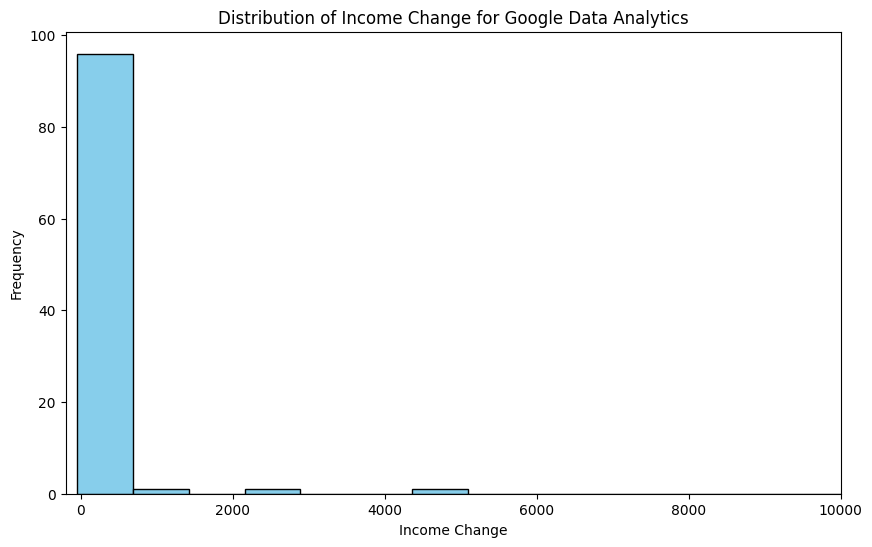


Certificate: Meta Social Media Marketing
Responses: 16
Income Changes >0: 3
Income Changes <0: 0
Income Changes max: 89.0
Income Changes min: 0.0
Mean income change: 10.625
Median income change: 0.0


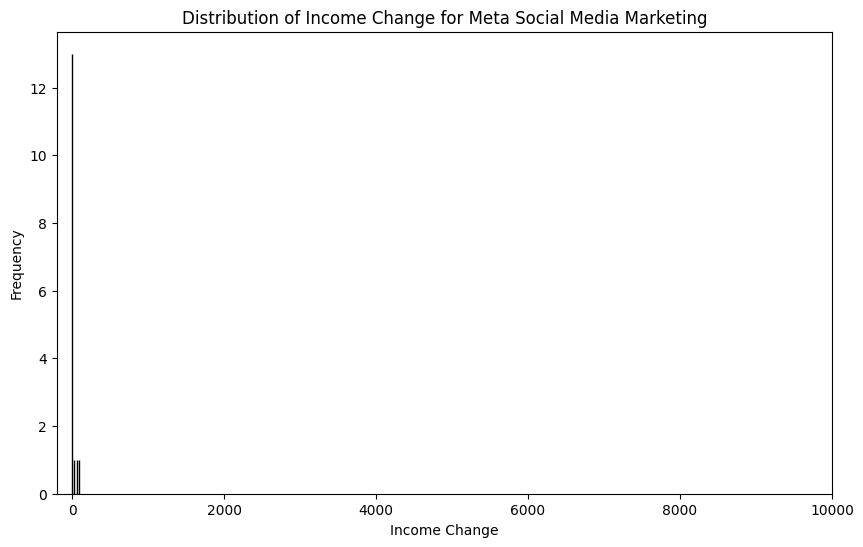


Certificate: Meta Marketing Analytics
Responses: 14
Income Changes >0: 3
Income Changes <0: 0
Income Changes max: 89.0
Income Changes min: 0.0
Mean income change: 12.785714285714286
Median income change: 0.0


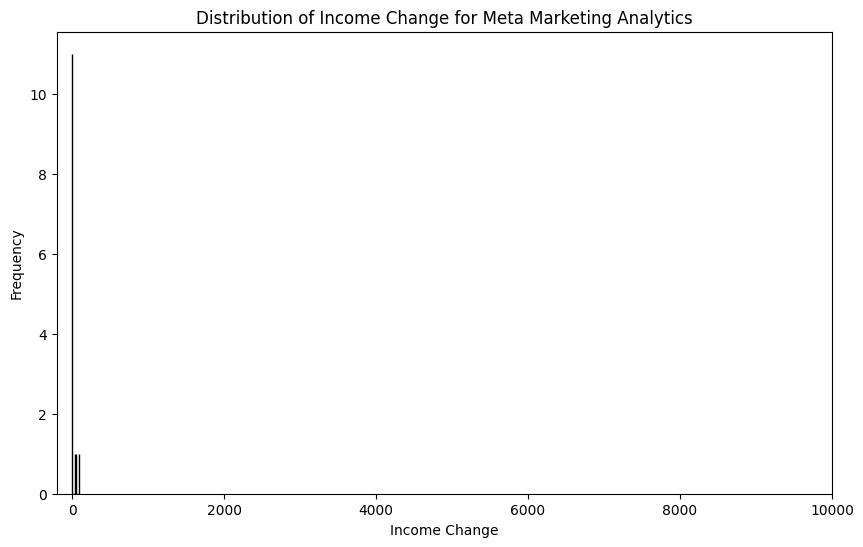


Certificate: Google Project Management
Responses: 64
Income Changes >0: 11
Income Changes <0: 0
Income Changes max: 72000.0
Income Changes min: 0.0
Mean income change: 1195.234375
Median income change: 0.0


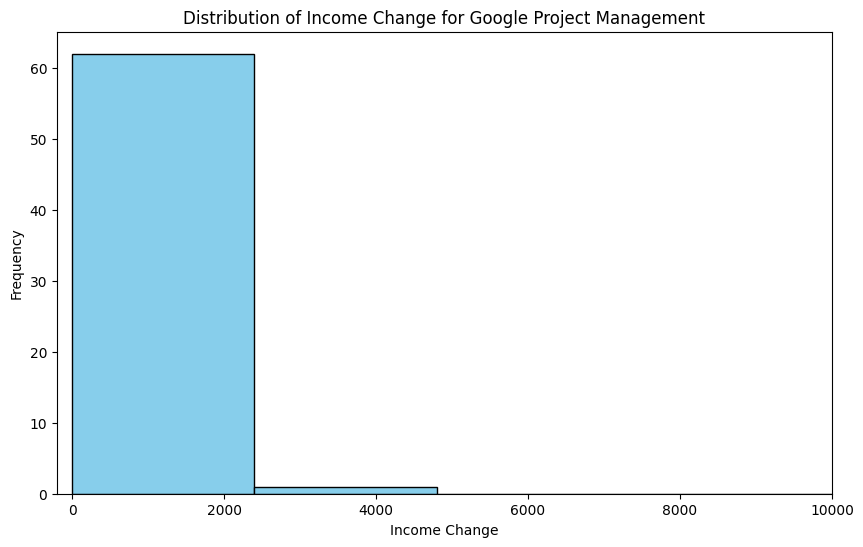


Certificate: Google Digital Marketing & E-commerce
Responses: 20
Income Changes >0: 1
Income Changes <0: 1
Income Changes max: 100.0
Income Changes min: -100.0
Mean income change: 0.0
Median income change: 0.0


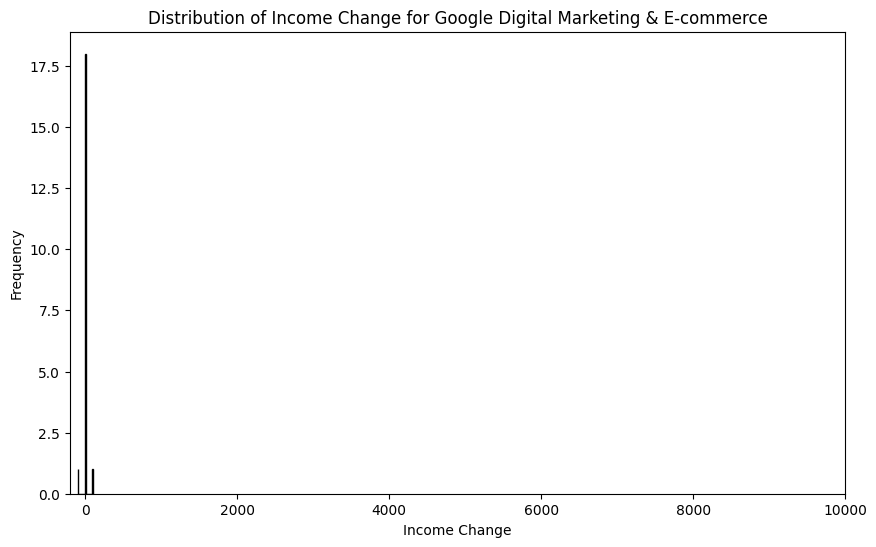


Certificate: Google UX Design
Responses: 27
Income Changes >0: 4
Income Changes <0: 0
Income Changes max: 70000.0
Income Changes min: 0.0
Mean income change: 2647.259259259259
Median income change: 0.0


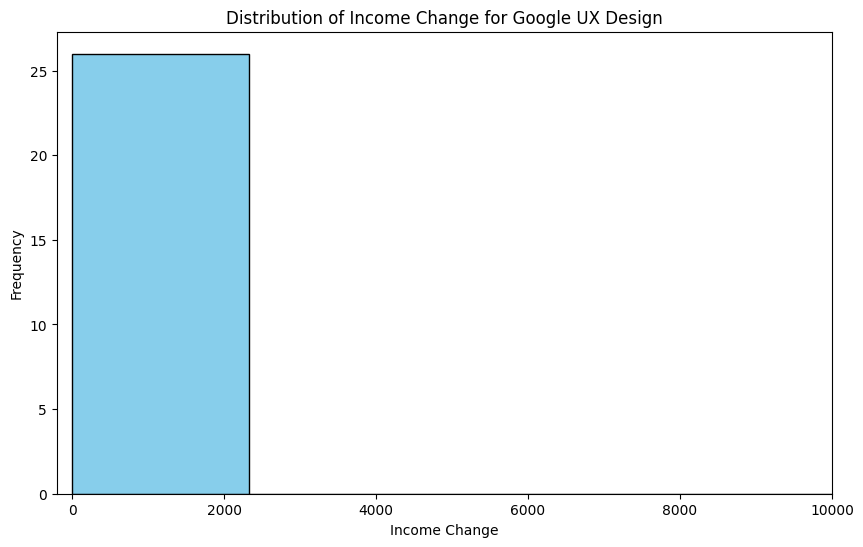


Certificate: Google IT Support
Responses: 32
Income Changes >0: 2
Income Changes <0: 1
Income Changes max: 100.0
Income Changes min: -10.0
Mean income change: 4.375
Median income change: 0.0


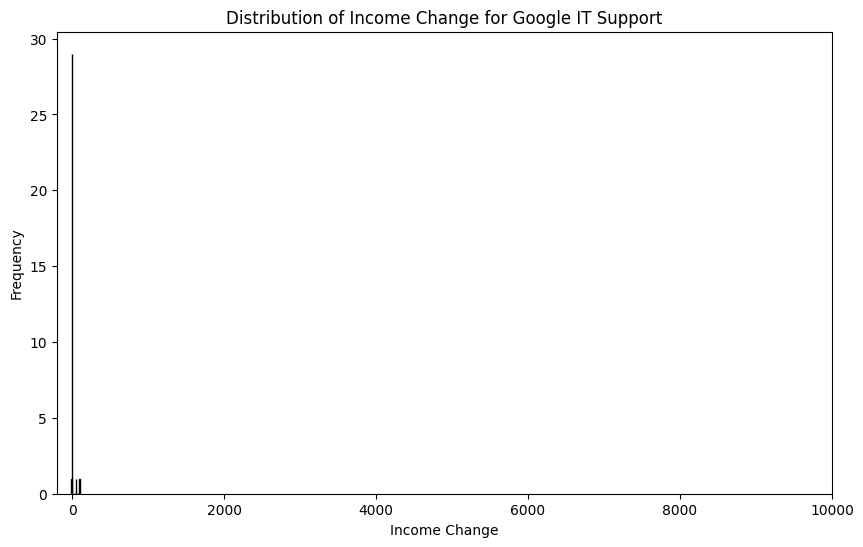


Certificate: Meta Database Engineer
Responses: 8
Income Changes >0: 0
Income Changes <0: 1
Income Changes max: 0.0
Income Changes min: -10.0
Mean income change: -1.25
Median income change: 0.0


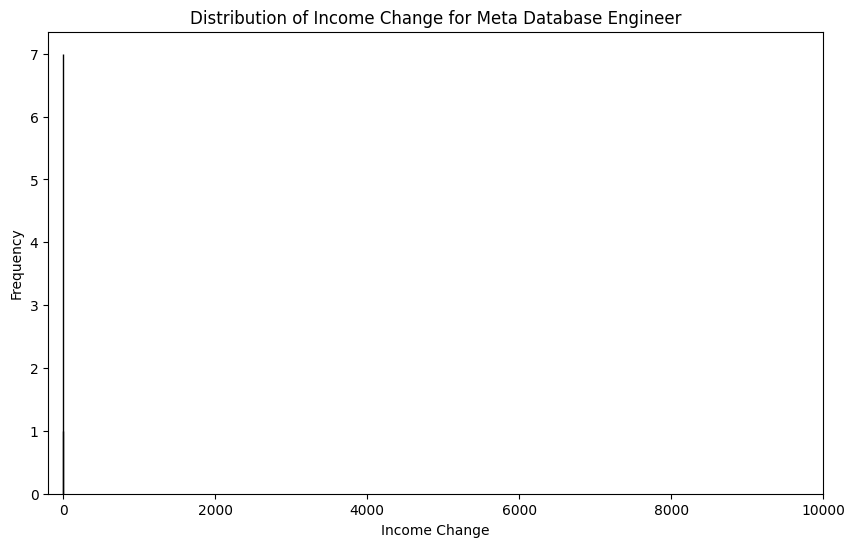


Certificate: Google IT Automation with Python
Responses: 4
Income Changes >0: 0
Income Changes <0: 0
Income Changes max: 0.0
Income Changes min: 0.0
Mean income change: 0.0
Median income change: 0.0


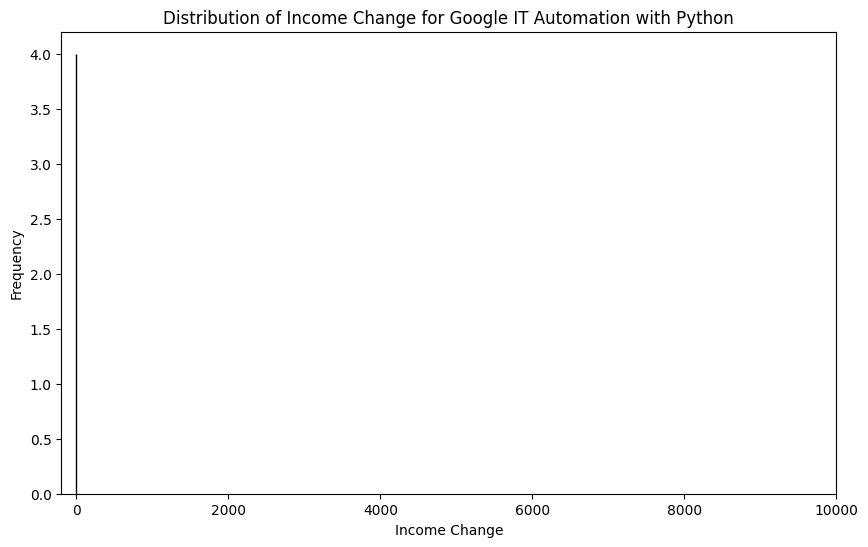


Certificate: Meta Back-End Developer
Responses: 3
Income Changes >0: 0
Income Changes <0: 0
Income Changes max: 0.0
Income Changes min: 0.0
Mean income change: 0.0
Median income change: 0.0


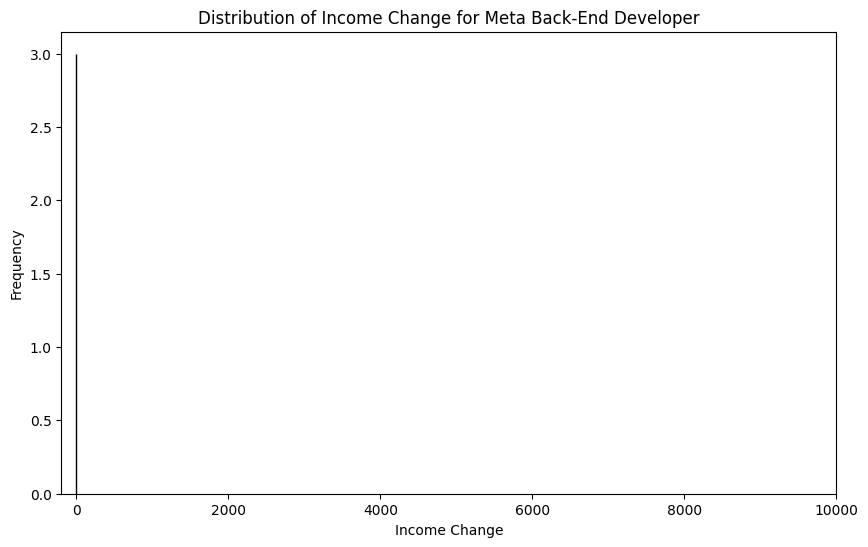


Certificate: Meta Front-End Developer
Responses: 4
Income Changes >0: 1
Income Changes <0: 0
Income Changes max: 72000.0
Income Changes min: 0.0
Mean income change: 18000.0
Median income change: 0.0


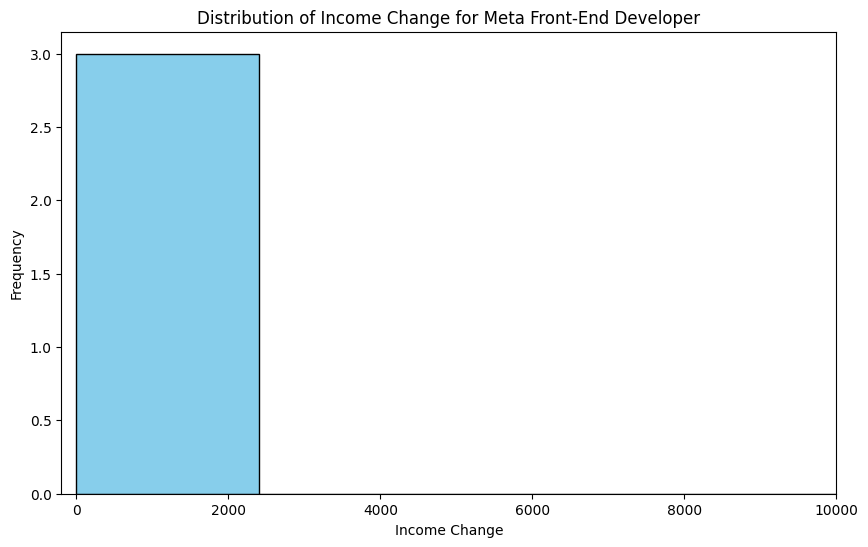


Certificate: Meta React Native
Responses: 2
Income Changes >0: 0
Income Changes <0: 0
Income Changes max: 0.0
Income Changes min: 0.0
Mean income change: 0.0
Median income change: 0.0


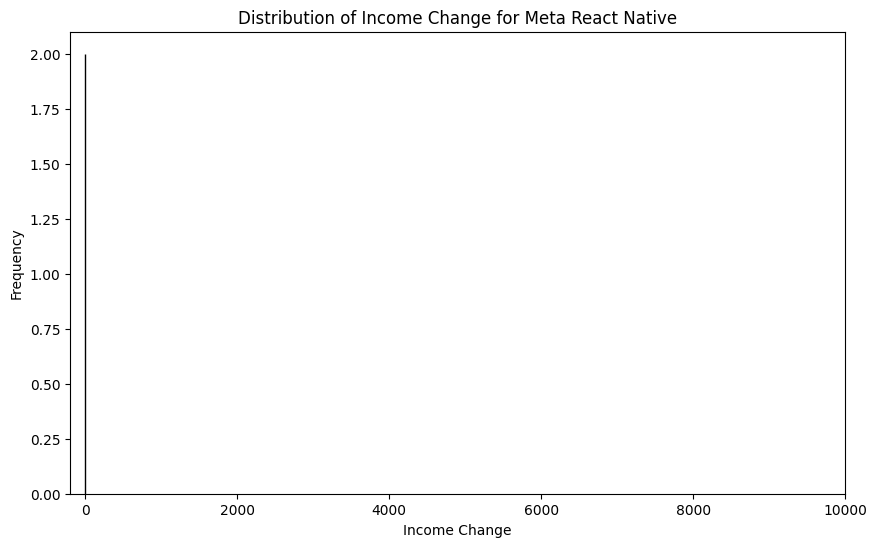

In [ ]:
# For each certificate, calculate the change in income for each respondent by subtracting the income before the program from the income after the program

# Calculate income change in a single step
filtered_data_copy.loc[:, 'Income_Change'] = filtered_data_copy['What is your average income after participating in the program?'] - filtered_data_copy['What was your average income before participating in the program?']

# Iterate over each certificate and print the mean and median of income change for each
for certificate in unique_certificates:
    temp_df = filtered_data_copy[filtered_data_copy['Collections completed'].apply(lambda x: certificate in x if isinstance(x, list) else False)]
    print(f"\nCertificate: {certificate}")
    print(f"Responses: {temp_df['Income_Change'].count()}")
    print(f"Income Changes >0: {sum(temp_df['Income_Change'] > 0)}")  # Number of income changes greater than 0
    print(f"Income Changes <0: {sum(temp_df['Income_Change'] < 0)}")  # Number of income changes less than 0
    print(f"Income Changes max: {temp_df['Income_Change'].max()}")  # Number of income changes greater than 0
    print(f"Income Changes min: {temp_df['Income_Change'].min()}")  # Number of income changes less than 0
    print(f"Mean income change: {temp_df['Income_Change'].mean()}")
    print(f"Median income change: {temp_df['Income_Change'].median()}")
    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(temp_df['Income_Change'], bins=30, color='skyblue', edgecolor='black')
    plt.xlim(-200, 10000) # Adjust this to focus on the area you are interested in
    plt.title(f'Distribution of Income Change for {certificate}')
    plt.xlabel('Income Change')
    plt.ylabel('Frequency')
    plt.show()



In [ ]:
# Describe the change in income for each certificate

# Flatten the list in 'Collections completed' and find unique values
unique_certificates = pd.Series([item for sublist in filtered_data_copy['Collections completed'].tolist() for item in sublist]).unique()

# Define an empty dataframe to store the results
results = pd.DataFrame()

# Iterate over unique certificates
for certificate in filtered_data_copy['Collections completed'].explode().unique():
    temp_df = filtered_data_copy[filtered_data_copy['Collections completed'].apply(lambda x: certificate in x if isinstance(x, list) else False)]

    # Calculate descriptive statistics
    stats = {
        'Certificate': certificate,
        'Responses': temp_df['Income_Change'].count(),
        'Income Changes >0': sum(temp_df['Income_Change'] > 0),
        'Income Changes <0': sum(temp_df['Income_Change'] < 0),
        'Income Changes max': temp_df['Income_Change'].max(),
        'Income Changes min': temp_df['Income_Change'].min(),
        'Mean income change': temp_df['Income_Change'].mean(),
        'Median income change': temp_df['Income_Change'].median(),
        'Standard deviation': temp_df['Income_Change'].std(),
        'Variance': temp_df['Income_Change'].var(),
        'Skewness': temp_df['Income_Change'].skew(),
        'Kurtosis': temp_df['Income_Change'].kurt()
    }

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame([stats])

    # Concatenate results to the dataframe
    results = pd.concat([results, stats_df], ignore_index=True)

# View resulting dataframe
results

,Certificate,Responses,Income Changes >0,Income Changes <0,Income Changes max,Income Changes min,Mean income change,Median income change,Standard deviation,Variance,Skewness,Kurtosis
0,Google Data Analytics,100,14,3,22000.0,-50.0,311.820000,0.0,2257.853720,5.097903e+06,9.221841,88.449534
1,Meta Social Media Marketing,16,3,0,89.0,0.0,10.625000,0.0,26.020184,6.770500e+02,2.540080,5.822685
2,Meta Marketing Analytics,14,3,0,89.0,0.0,12.785714,0.0,27.361339,7.486429e+02,2.152921,4.128958
3,Google Project Management,64,11,0,72000.0,0.0,1195.234375,0.0,8999.259292,8.098667e+07,7.978076,63.756333
4,Google Digital Marketing & E-commerce,20,1,1,100.0,-100.0,0.000000,0.0,32.444284,1.052632e+03,0.000000,9.500000
5,Google UX Design,27,4,0,70000.0,0.0,2647.259259,0.0,13461.854946,1.812215e+08,5.194569,26.988547
6,Google IT Support,32,2,1,100.0,-10.0,4.375000,0.0,19.664525,3.866935e+02,4.362010,19.729310
7,Meta Database Engineer,8,0,1,0.0,-10.0,-1.250000,0.0,3.535534,1.250000e+01,-2.828427,8.000000
8,Google IT Automation with Python,4,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
9,Meta Back-End Developer,3,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000,NaN



Certificate: Google Data Analytics
Responses: 34
Mean income percentage change: 8.65537354182179
Median income percentage change: 0.0


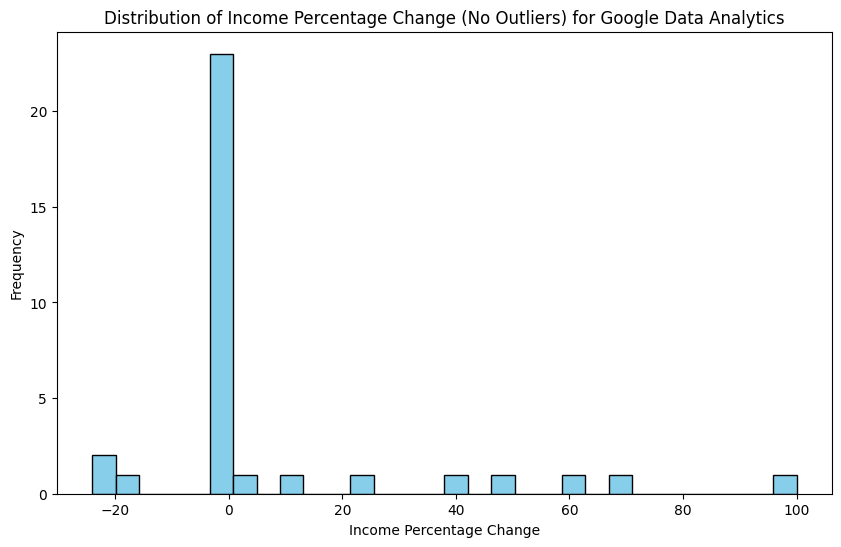

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)



Certificate: Meta Social Media Marketing
Responses: 0
Mean income percentage change: nan
Median income percentage change: nan


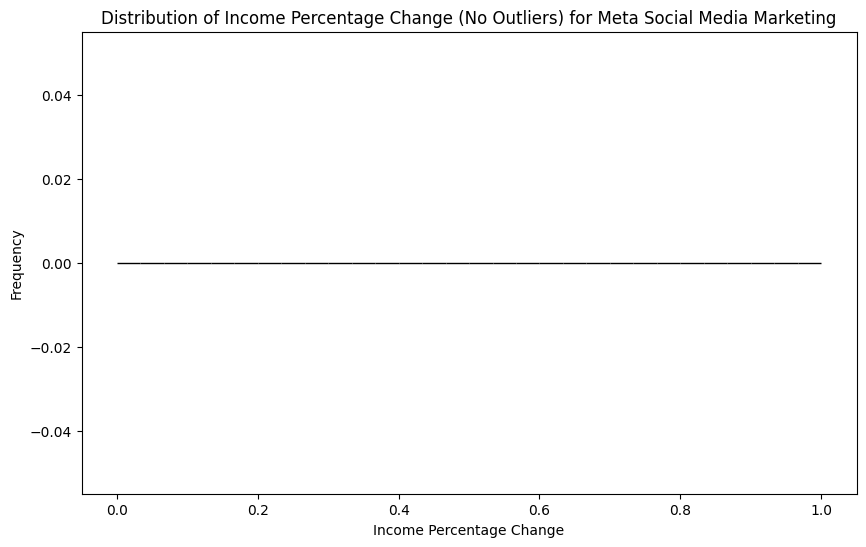


Certificate: Meta Marketing Analytics
Responses: 6
Mean income percentage change: 35.22222222222222
Median income percentage change: 0.0


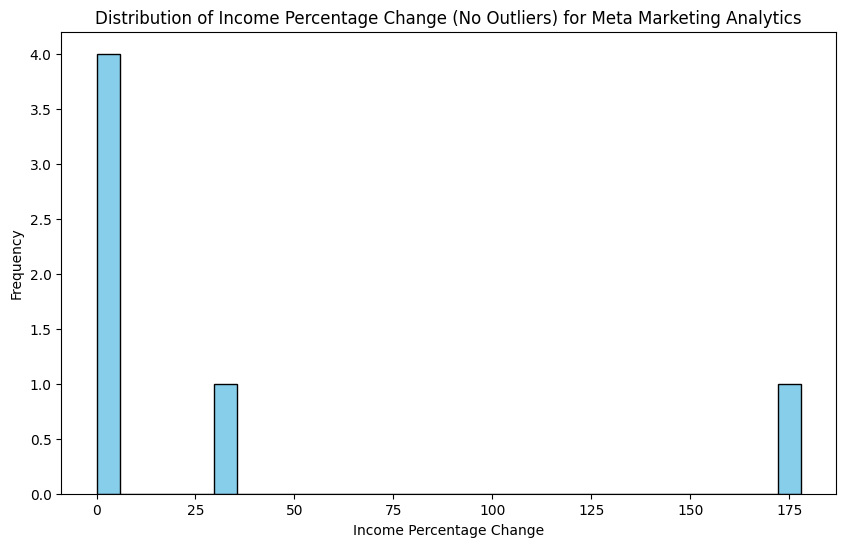


Certificate: Google Project Management
Responses: 24
Mean income percentage change: 8.043981481481481
Median income percentage change: 0.0


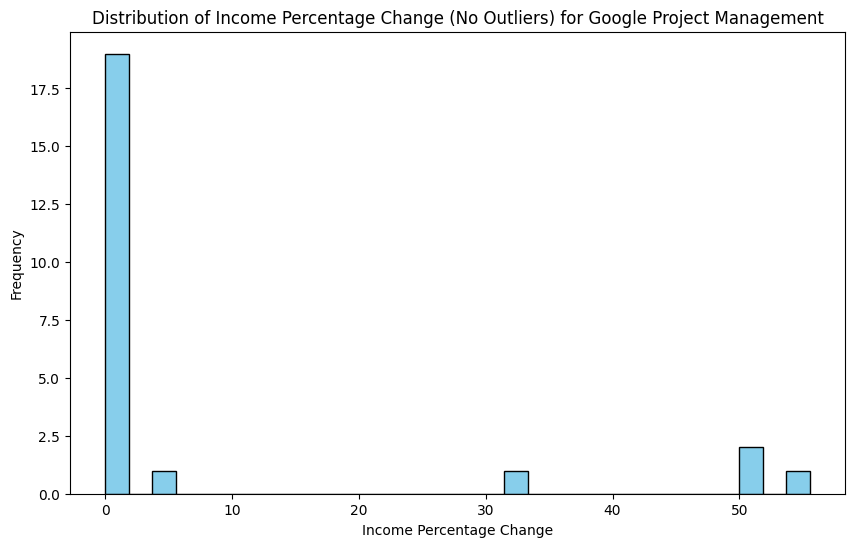


Certificate: Google Digital Marketing & E-commerce
Responses: 7
Mean income percentage change: 0.0
Median income percentage change: 0.0


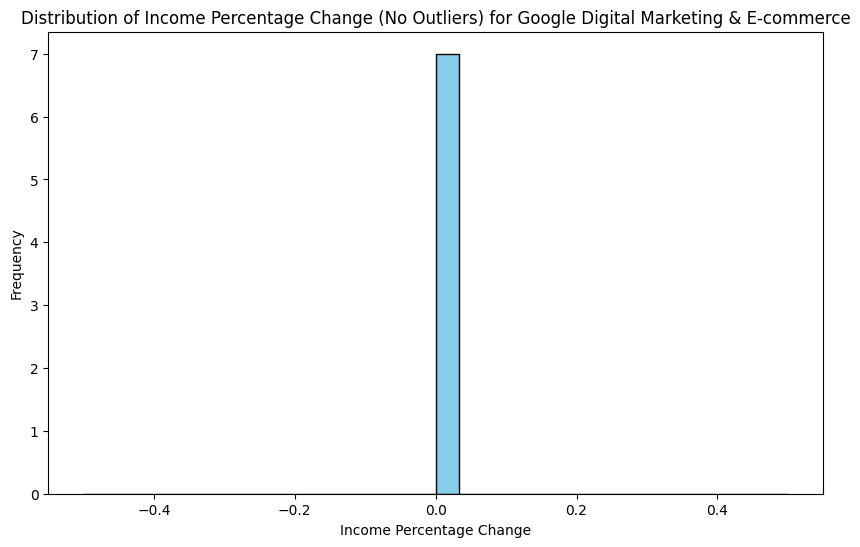


Certificate: Google UX Design
Responses: 10
Mean income percentage change: 5.0
Median income percentage change: 0.0


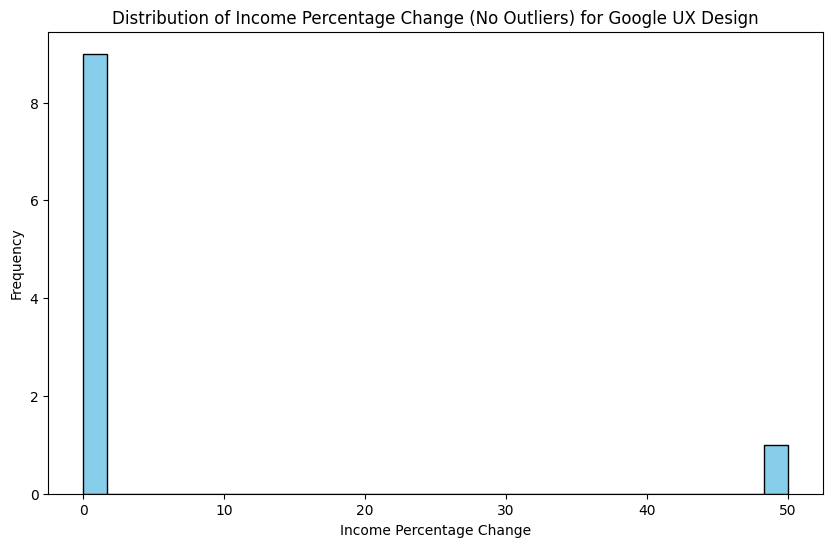


Certificate: Google IT Support
Responses: 9
Mean income percentage change: 0.0
Median income percentage change: 0.0


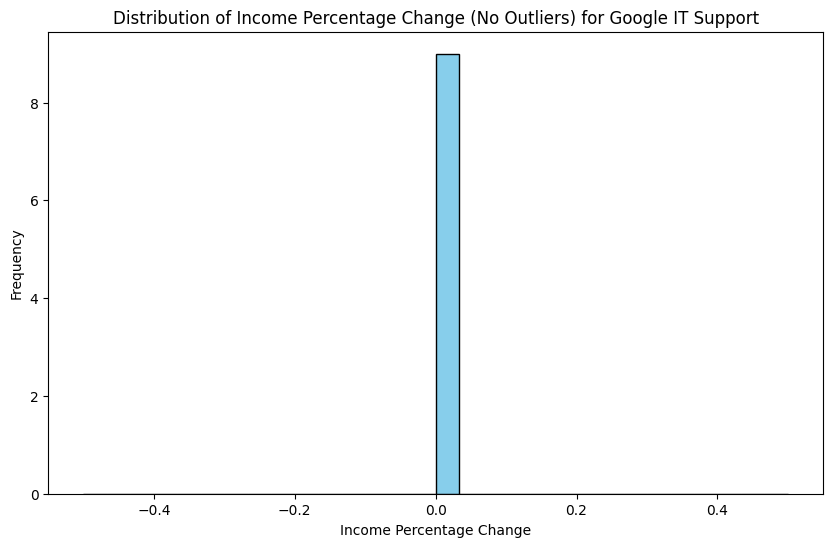


Certificate: Meta Database Engineer
Responses: 4
Mean income percentage change: 0.0
Median income percentage change: 0.0


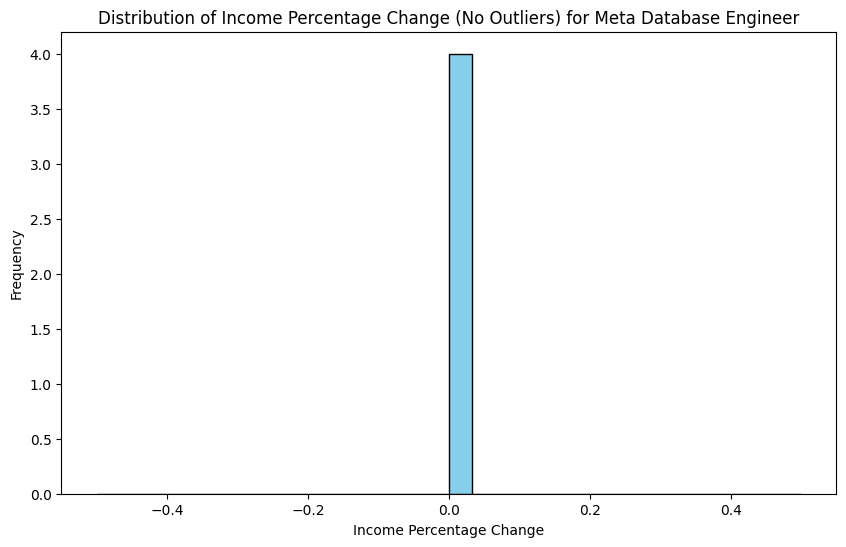


Certificate: Google IT Automation with Python
Responses: 0
Mean income percentage change: nan
Median income percentage change: nan


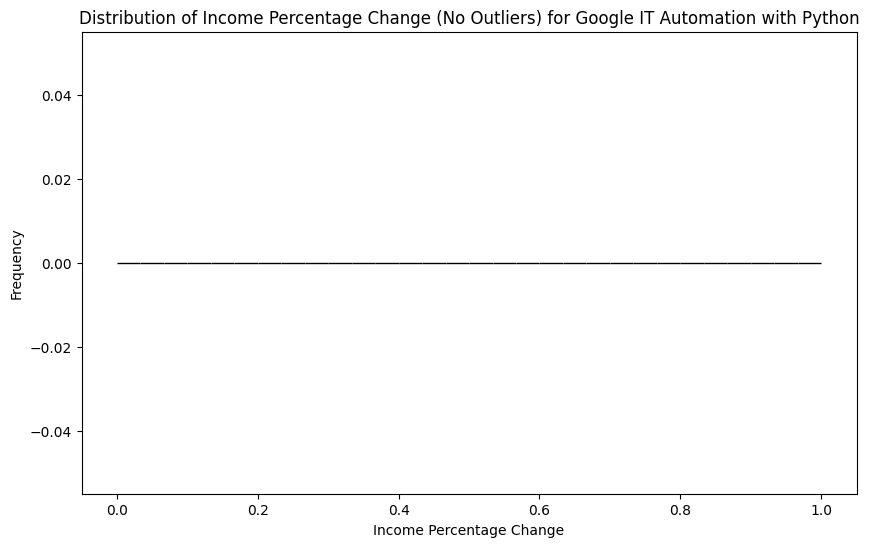


Certificate: Meta Back-End Developer
Responses: 1
Mean income percentage change: 0.0
Median income percentage change: 0.0


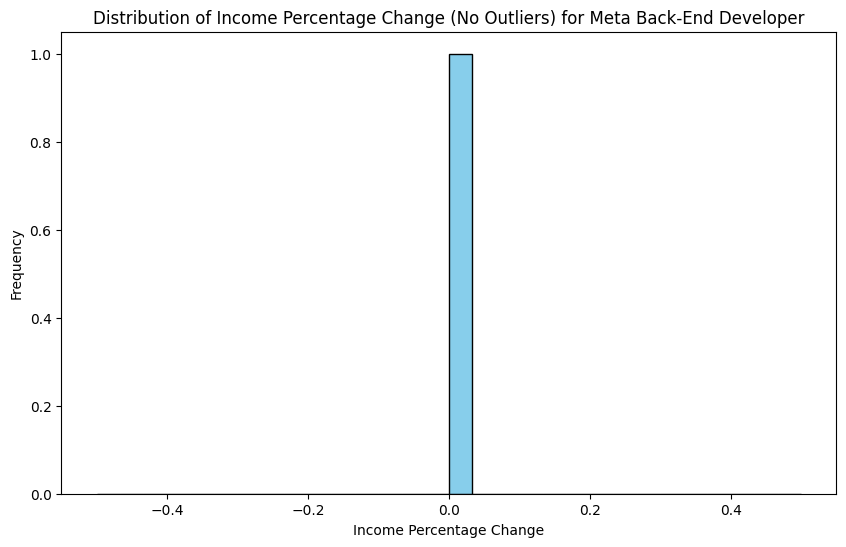


Certificate: Meta Front-End Developer
Responses: 3
Mean income percentage change: 800.0
Median income percentage change: 0.0


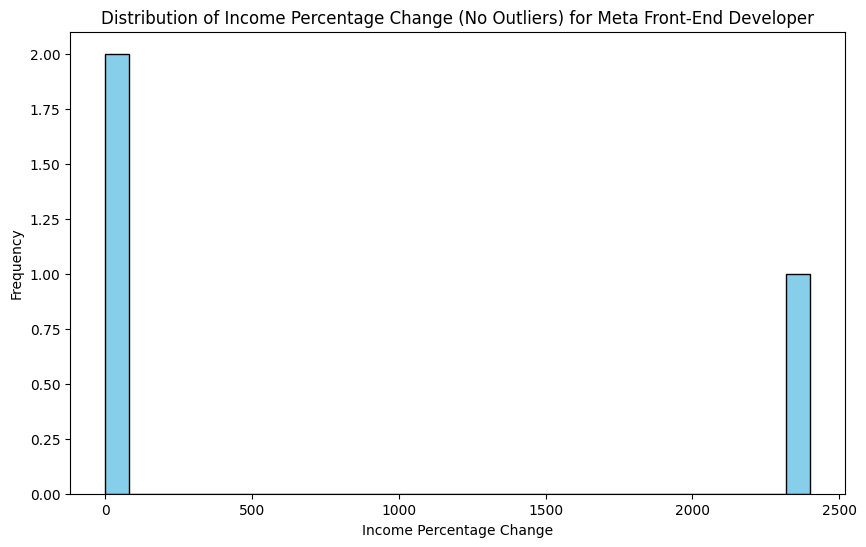


Certificate: Meta React Native
Responses: 1
Mean income percentage change: 0.0
Median income percentage change: 0.0


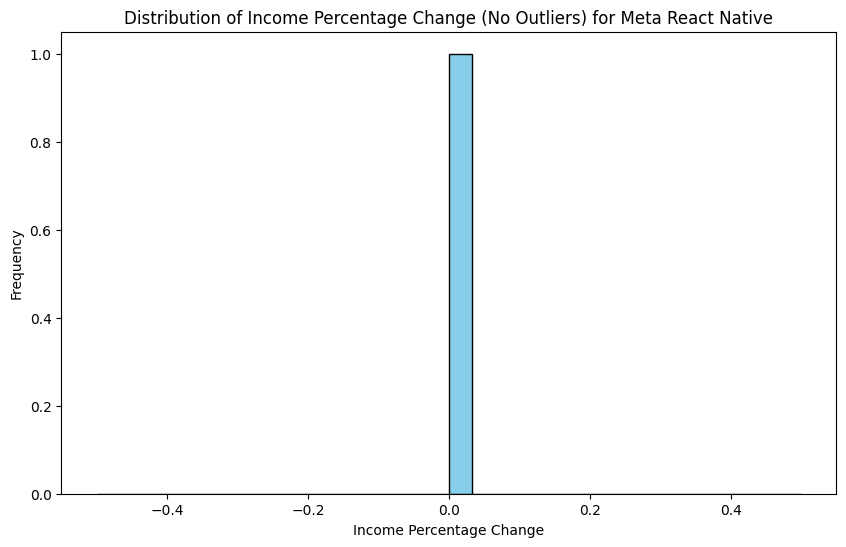

In [ ]:
# Calculate relative changes in income and plot the results

# Iterate over each unique certificate
for certificate in unique_certificates:
    # Filter data for the current certificate
    temp_df = filtered_data_copy[filtered_data_copy['Collections completed'].apply(lambda x: certificate in x if isinstance(x, list) else False)].copy()

    # Calculate the percentage change in income for each respondent in the current certificate
    temp_df['Income_Percentage_Change'] = ((temp_df['What is your average income after participating in the program?'] - temp_df['What was your average income before participating in the program?']) / temp_df['What was your average income before participating in the program?']) * 100

    # Calculate the IQR of the income percentage change for the current certificate
    Q1 = temp_df['Income_Percentage_Change'].quantile(0.25)
    Q3 = temp_df['Income_Percentage_Change'].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_data_no_outliers = temp_df[(temp_df['Income_Percentage_Change'] >= lower_limit) &
                                        (temp_df['Income_Percentage_Change'] <= upper_limit)]

    print(f"\nCertificate: {certificate}")
    print(f"Responses: {filtered_data_no_outliers['Income_Percentage_Change'].count()}")
    print(f"Mean income percentage change: {filtered_data_no_outliers['Income_Percentage_Change'].mean()}")
    print(f"Median income percentage change: {filtered_data_no_outliers['Income_Percentage_Change'].median()}")

    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(filtered_data_no_outliers['Income_Percentage_Change'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Income Percentage Change (No Outliers) for {certificate}')
    plt.xlabel('Income Percentage Change')
    plt.ylabel('Frequency')
    plt.show()



In [ ]:
# Calculate the relative changes in income as a dataframe

# Calculate the percentage change in income for each respondent
filtered_data_copy['Income_Percentage_Change'] = ((filtered_data_copy['What is your average income after participating in the program?'] - filtered_data_copy['What was your average income before participating in the program?']) / filtered_data_copy['What was your average income before participating in the program?']) * 100

# Remove rows with NaN
filtered_data_copy = filtered_data_copy.replace([np.inf, -np.inf], np.nan).dropna(subset=["Income_Percentage_Change"], how="all")


# Define an empty dataframe to store the results
results_relative = pd.DataFrame()

# Iterate over unique certificates
for certificate in filtered_data_copy['Collections completed'].explode().unique():
    temp_df = filtered_data_copy[filtered_data_copy['Collections completed'].apply(lambda x: certificate in x if isinstance(x, list) else False)]

    # Calculate descriptive statistics
    stats = {
        'Certificate': certificate,
        'Responses': temp_df['Income_Percentage_Change'].count(),
        'Income Changes >0%': sum(temp_df['Income_Percentage_Change'] > 0),
        'Income Changes <0%': sum(temp_df['Income_Percentage_Change'] < 0),
        'Income Changes max (%)': temp_df['Income_Percentage_Change'].max(),
        'Income Changes min (%)': temp_df['Income_Percentage_Change'].min(),
        'Mean income percentage change': temp_df['Income_Percentage_Change'].mean(),
        'Median income percentage change': temp_df['Income_Percentage_Change'].median(),
        'Standard deviation (%)': temp_df['Income_Percentage_Change'].std(),
        'Variance (%)': temp_df['Income_Percentage_Change'].var(),
        'Skewness (%)': temp_df['Income_Percentage_Change'].skew(),
        'Kurtosis (%)': temp_df['Income_Percentage_Change'].kurt()
    }

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame([stats])

    # Concatenate results to the dataframe
    results_relative = pd.concat([results_relative, stats_df], ignore_index=True)

# Show the results
results_relative


,Certificate,Responses,Income Changes >0%,Income Changes <0%,Income Changes max (%),Income Changes min (%),Mean income percentage change,Median income percentage change,Standard deviation (%),Variance (%),Skewness (%),Kurtosis (%)
0,Google Data Analytics,37,11,3,297.196262,-24.050633,26.564296,0.0,67.308122,4.530383e+03,2.819048,8.034148
1,Meta Social Media Marketing,5,1,0,178.000000,0.000000,35.600000,0.0,79.604020,6.336800e+03,2.236068,5.000000
2,Google Project Management,27,8,0,2400.000000,0.000000,115.615814,0.0,463.466705,2.148014e+05,4.970169,25.232910
3,Meta Marketing Analytics,7,3,0,400.000000,0.000000,87.333333,0.0,152.427761,2.323422e+04,1.877048,3.128764
4,Google IT Support,11,1,1,100.000000,-25.000000,6.818182,0.0,31.801944,1.011364e+03,2.941308,9.533518
5,Meta Database Engineer,5,0,1,0.000000,-25.000000,-5.000000,0.0,11.180340,1.250000e+02,-2.236068,5.000000
6,Google UX Design,11,2,0,2700.000000,0.000000,250.000000,0.0,812.711511,6.605000e+05,3.314574,10.989974
7,Meta Back-End Developer,1,0,0,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
8,Google Digital Marketing & E-commerce,9,1,1,100.000000,-100.000000,0.000000,0.0,50.000000,2.500000e+03,0.000000,4.000000
9,Meta React Native,1,0,0,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Examine changes in income

pd.set_option('display.max_rows', 100) # change max rows shown

print(filtered_data_copy['Income_Change'])

pd.reset_option('display.max_rows') # reset max rows shown to default

3       0.0
4       0.0
5       0.0
8       0.0
9       0.0
       ... 
621     0.0
623     0.0
628     0.0
630   -20.0
631     0.0
Name: Income_Change, Length: 216, dtype: float64


In [ ]:
# Filter for learners who have had a large increase in income

# Adjust default display settings
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Filter and display rows where 'Income_Change' is greater than 1000
income_change_greater_than_1000 = filtered_data_copy[filtered_data_copy['Income_Change'] > 1000]

# View
income_change_greater_than_1000

,ID Email,Name,Collection Rollup,Overall status (new end date),Collections completed,Number of Collections registered,Number of Collections registered (from manual input),Collections correlation,Courses unenrolled from (MiniExt form),Completed Courses,Collections,Country_x,Learner Status,Survey ID,ID Email (from Learners),Name (from Learners),First Name (from Learners),Survey Type,"As a result of the course, I feel I know more people who can help me in developing my career",Through the course I have extended my connections with peers,I feel ready to start a job in the subject I learnt,I feel more confident to apply for jobs with this certification,The skills I’ve learnt in this course will be useful for my career,I plan to pursue a career in the topic of my certificate,I am able to showcase what I learnt in this course to a potential employer,I feel that employers will take this certification seriously,I need to get more qualifications before an employer would consider me,I need to get more experience before an employer would consider me,I know exactly what I need to do to get a job and start a career in the chosen field,"Getting a job is extremely difficult, and I need support to find a job",What are your next steps:,"Has this certification led you to a further opportunity? If so, please briefly share how:",Google would like to share success stories of learners who completed their certificates. This could be a good way to get your name out. Do you have a success story that you would be happy to share?,Are you currently employed?,What is your current job title?,Survey completed,Have you found a job since participating in the ACN Scholarship? (1),What job did you get? (just the relevant field is fine),Did the job you get align with the course you did with the ACN?,Do you feel like the course you did contributed to you getting the job?,Did you get the job during or after participating in the ACN course?,Did this opportunity give you a platform to enhance your connections in the job market?,Is the income generated from this job sufficient for you to live comfortably? (this could be to support just yourself or the people you care for),What company are you working for?,When did you get this job?,The courses on the ACN Scholarship helped me land this job?,Type of employment,"Do you have a higher income after completing the program, compared to the start of the program?",What was your average income before participating in the program?,What is your average income after participating in the program?,Are you comfortable answering questions relating to your income?,Submission date,Learner ID,Record created,First Name,Last name,Preferred Name,Gender,Do you have a computer to do this course?,How do you connect to the internet?,Nationality,Highest Education ACN,Refugee ACN,Date of birth,Country_y,Movement (location),Displacement status,Country of birth,No longer in country,Disability,Are you currently living as a refugee?,Nearest Metropolitan area,How close do you live to this city/town?,Race,Education currently busy with (if not highest education achieved),Age,English proficiency,Daily Responsibilities,Approx. monthly income (USD),What commitments would you have to continue with?,Aptitude test status,Generalised Education level,Disability description,Country Consolidated,Income_Before_Bins,Income_After_Bins,Income_Change
51,anuri.nwankwo@gmail.com,Anulika Joy Nwankwo,"Meta Android Developer, Meta Database Engineer...",🏁 Finished: Google UX Design,[Google UX Design],3,1,NaN,NaN,"Conduct UX Research and Test Early Concepts, B...",Google UX Design,NaN,Graduated (GwG) - 07-Dec-22,Anulika Joy Nwankwo - anuri.nwankwo@gmail.com,anuri.nwankwo@gmail.com,Anulika Joy Nwankwo,Anulika,Course completion survey,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,"I’m going to study further,I’m looking for a n...",NaN,I learned alot about User Experience from the ...,No,NaN,2023-01-27,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,

In [ ]:
# Reset display settings to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')